<a href="https://colab.research.google.com/github/lokeshbaranwal/Pose-Estimation-of-Satellite/blob/master/More_Accurate_Model_for_SpeedvL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:

dataset_root="/content/gdrive/My Drive/speed"
import pandas as pd
import os
import json
import numpy as np
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.models import Model
from keras.layers import Dense,Flatten,Activation
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
from keras.preprocessing import image

Using TensorFlow backend.


In [3]:
with open(os.path.join(dataset_root,'train.json'),'r') as train:
  train_json=json.load(train)
train_json[0]['q_vbs2tango']
#len(train_json)
#train_json
# q=train_json[i]['q_vbs2tango']
# r=train_json[i]['r_Vo2To_vbs_true']
# a=q.extend(r)


[-0.419541, -0.484436, -0.214179, 0.73718]

In [0]:
imgname_list=[]
for i in range(len(train_json)):
  imgname_list.append(train_json[i]['filename'])

#imgname_list

In [0]:
label_list=[]
q1,q2,q3,q4,r1,r2,r3=[],[],[],[],[],[],[]
for i in range(len(train_json)):
  q1.append(train_json[i]['q_vbs2tango'][0])
  q2.append(train_json[i]['q_vbs2tango'][1])
  q3.append(train_json[i]['q_vbs2tango'][2])
  q4.append(train_json[i]['q_vbs2tango'][3])
  r1.append(train_json[i]['r_Vo2To_vbs_true'][0])
  r2.append(train_json[i]['r_Vo2To_vbs_true'][1])
  r3.append(train_json[i]['r_Vo2To_vbs_true'][2])
  #q.extend(r)
  #label_list.append(q)
#label_list


In [6]:
col_dict={'image_names':imgname_list,'q1':q1,'q2':q2,'q3':q3,'q4':q4,'r1':r1,'r2':r2,'r3':r3}
df=pd.DataFrame(col_dict)
#df['labels']=label_list
df_train,df_test=train_test_split(df,test_size=0.2)
len(df_test)


2400

In [7]:
path="/content/gdrive/My Drive/speed/images/train"
cols=['q1','q2','q3','q4','r1','r2','r3']
datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=datagen.flow_from_dataframe(df_train,directory=path,x_col='image_names',y_col=cols,class_mode='other',target_size=(224,224),batch_size=32,color_mode='rgb')
validation_generator=datagen.flow_from_dataframe(df_test,directory=path,x_col='image_names',y_col=cols,class_mode='other',target_size=(224,224),batch_size=32,color_mode='rgb')


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/dataframe_iterator.py:273: UserWarning: Found 3 invalid image filename(s) in x_col="image_names". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 9597 validated image filenames.
Found 2400 validated image filenames.


In [8]:
#Building our model using Transfer Learning
tensorflow.keras.backend.set_learning_phase(0)
model_pretrained=ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)
tensorflow.keras.backend.set_learning_phase(1)
x=model_pretrained.output
#x=Flatten()(x)
x=Dense(1024,activation='relu')(x)
#x=BatchNormalization()(x)
#x=Activation('relu')(x)
#x=Dropout(0.5)(x)
x=Flatten()(x)
x=Dense(7,activation='linear')(x)

model=Model(inputs=model_pretrained.input,outputs=x)

# model.fit_generator(train_generator,steps_per_epoch=step_size_train,validation_data=validation_generator,validation_steps=step_size_valid,epochs=20)


W0722 18:28:32.370730 139624357685120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 18:28:32.371982 139624357685120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 18:28:32.386191 139624357685120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0722 18:28:32.420231 139624357685120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0722 18:28:32.421306

94658560/94653016 [==============================] - 2s 0us/step


In [0]:
# for i,j in enumerate(model.layers):
#   print(i,':',j)
# for layer in model.layers[:175]:
#   layer.trainable=False
# for layer in model.layers[175:]:
#   layer.trainable=True

In [10]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [11]:
model.compile(optimizer='adam',loss='mean_squared_error') #,metrics=['mse']

step_size_train=train_generator.n//train_generator.batch_size #It should typically be equal to the number of samples of your dataset divided by the batch size.
step_size_valid=validation_generator.n//validation_generator.batch_size

W0722 18:28:44.535248 139624357685120 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [12]:
history = model.fit_generator(train_generator,steps_per_epoch=step_size_train,validation_data=validation_generator,validation_steps=step_size_valid,epochs=20)


Epoch 1/20
299/299 [==============================] - 4106s 14s/step - loss: 7.4180 - val_loss: 22.0182
Epoch 2/20
299/299 [==============================] - 260s 870ms/step - loss: 1.7220 - val_loss: 1.9193
Epoch 3/20
299/299 [==============================] - 248s 830ms/step - loss: 1.1407 - val_loss: 4.1848
Epoch 4/20
299/299 [==============================] - 251s 839ms/step - loss: 0.9354 - val_loss: 3.0139
Epoch 5/20
299/299 [==============================] - 247s 826ms/step - loss: 0.7608 - val_loss: 1.1816
Epoch 6/20
299/299 [==============================] - 246s 824ms/step - loss: 0.6382 - val_loss: 0.7722
Epoch 7/20
299/299 [==============================] - 244s 818ms/step - loss: 0.5632 - val_loss: 11.0436
Epoch 8/20
299/299 [==============================] - 245s 819ms/step - loss: 0.5042 - val_loss: 9.7929
Epoch 9/20
299/299 [==============================] - 245s 820ms/step - loss: 0.4231 - val_loss: 0.6729
Epoch 10/20
299/299 [==============================] - 244s 817

In [0]:
# label_list=[]
# q1,q2,q3,q4,r1,r2,r3=[],[],[],[],[],[],[]
# for i in range(len(real_json)):
#   q1.append(real_json[i]['q_vbs2tango'][0])
#   q2.append(real_json[i]['q_vbs2tango'][1])
#   q3.append(real_json[i]['q_vbs2tango'][2])
#   q4.append(real_json[i]['q_vbs2tango'][3])
#   r1.append(real_json[i]['r_Vo2To_vbs_true'][0])
#   r2.append(real_json[i]['r_Vo2To_vbs_true'][1])
#   r3.append(real_json[i]['r_Vo2To_vbs_true'][2])

In [0]:
# test_datagen=ImageDataGenerator(rescale=1./255.)
# test_generator=test_datagen.flow_from_dataframe(dataframe=testdf,directory="./test/",x_col="id",y_col=None,batch_size=32,seed=42,shuffle=False,class_mode=None,target_size=(32,32))

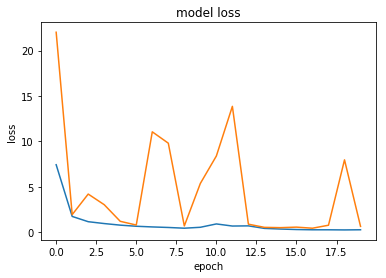

[22.018192214965822,
 1.9192844812075298,
 4.184842119216919,
 3.013882934252421,
 1.1815814395745596,
 0.7722376135985056,
 11.043626982371013,
 9.792937189737955,
 0.6729029313723246,
 5.354681797027588,
 8.380744002660116,
 13.850656973520914,
 0.8659150532881419,
 0.5169726401567459,
 0.4837750522295634,
 0.541156390508016,
 0.42274043103059133,
 0.7512679080168406,
 7.955356295903524,
 0.625426017443339]

In [15]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
history.history['val_loss']

In [0]:
#Evaluating the model on Synthetic image
test_result=[]
with open(os.path.join(dataset_root,'test.json'),'r') as f_eval:
  test_list=json.load(f_eval)

for img in test_list:
  img_path=os.path.join(dataset_root,'images','test',img['filename'])
  img_arr=image.load_img(img_path,target_size=(224,224))
  x=image.img_to_array(img_arr)
  x=preprocess_input(x)
  x=np.expand_dims(x,axis=0)
  output=model.predict(x)
  test_result.append({'filename':img['filename'],'q':output[:4],'r':output[4:]}) 

In [17]:
#Evaluating the model on Synthetic image
img_path=os.path.join(dataset_root,'images','test','img000014.jpg')
img_arr=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img_arr)
x=preprocess_input(x)
x=np.expand_dims(x,axis=0)
output=model.predict(x)
output

array([[-0.0288149 , -0.01364141, -0.0176045 , -0.01971582,  0.02832259,
        -0.22916   ,  6.5008826 ]], dtype=float32)

In [18]:
img_path=os.path.join(dataset_root,'images','real','img000187real.jpg')
img_arr=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img_arr)
x=preprocess_input(x)
x=np.expand_dims(x,axis=0)
output=model.predict(x)
output

array([[-0.08685398, -0.32801402,  0.00455328, -0.06401775,  0.20557567,
        -0.10939299,  3.9156215 ]], dtype=float32)

In [0]:
rgt =3.3147212478
rest =3.9225399824


In [0]:
t=LA.norm([rgt-rest],2)/LA.norm([rgt],2)

In [24]:
t #position_score for image 'img000187real.jpg'

0.1833694869526096